In [ ]:
# Multiclass
# You should install skitlearn and pandas libraries before use these codes
# otherwise you might get errors.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
dataset = fetch_openml('mnist_784')

In [2]:
type(dataset), type(dataset["data"]), type(dataset["target"])

(sklearn.utils.Bunch, pandas.core.frame.DataFrame, pandas.core.series.Series)

In [3]:
X, y = dataset["data"].to_numpy(), dataset["target"].to_numpy()

In [32]:
X = X / 225
X.shape

(784, 60000)

In [10]:
# mnist = fetch_mldata('MNIST original')
# X, y = mnist["data"], mnist["target"]
# 
# X = X / 255

import numpy as np

In [33]:
y.shape

(1, 70000)

In [12]:
digits = 10
examples = y.shape[1]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [14]:
Y_new.shape

(10, 70000)

In [15]:
Y_new[:,100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [16]:
y[0, 100]

'5'

In [17]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

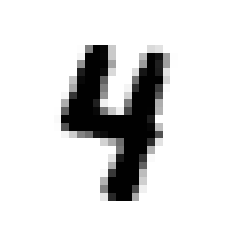

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [23]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = plt.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [24]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [25]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [26]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  9.079020337185264
Epoch 100 cost:  0.7358497406335416
Epoch 200 cost:  0.5559021198253925
Epoch 300 cost:  0.4771042645098883
Epoch 400 cost:  0.4300583572572702
Epoch 500 cost:  0.3974586779240274
Epoch 600 cost:  0.37289232768580705
Epoch 700 cost:  0.35334823750241506
Epoch 800 cost:  0.337187269201292
Epoch 900 cost:  0.3234603349045341
Epoch 1000 cost:  0.31154456407312897
Epoch 1100 cost:  0.30100523796374645
Epoch 1200 cost:  0.2915466525801045
Epoch 1300 cost:  0.28297152929188524
Epoch 1400 cost:  0.2751367558604832
Epoch 1500 cost:  0.2679243357851417
Epoch 1600 cost:  0.261238458429773
Epoch 1700 cost:  0.25500487348328627
Epoch 1800 cost:  0.2491675895360655
Epoch 1900 cost:  0.2436906666684975
Final cost: 0.23860328201067377


In [28]:
from sklearn.metrics import classification_report, confusion_matrix

Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 947    0    8    1    1   10   15    1    7    8]
 [   0 1109    7    1    0    1    3   12    3    7]
 [   3    4  920   19    7    6   10   19    7    1]
 [   1    4   28  923    2   27    3   12   21    7]
 [   1    0   10    2  894   10   12    7   11   42]
 [  11    1    6   21    0  797   12    1   24   13]
 [  13    4   12    1   16    8  896    0   15    2]
 [   1    1   13   16    4    4    2  944    3   17]
 [   3   12   24   19   11   28    4    3  866    9]
 [   0    0    4    7   47    1    1   29   17  903]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       998
           1       0.98      0.97      0.97      1143
           2       0.89      0.92      0.91       996
           3       0.91      0.90      0.91      1028
           4       0.91      0.90      0.91       989
           5       0.89      0.90      0.90       886
           6       0.94      0.93      0.93       967
           7       0.92      0.94   